***
# TEST
***

In [ ]:
import os
import json
import pandas as pd
import pvdeg
from pytest import approx
from pvdeg import TEST_DATA_DIR

#Load weather data
WEATHER = pd.read_csv(os.path.join(TEST_DATA_DIR, 'weather_day_pytest.csv'),
                         index_col= 0, parse_dates=True)
with open(os.path.join(TEST_DATA_DIR, 'meta.json'),'r') as file:
    META = json.load(file)

#Load expected results
rh_expected = pd.read_csv(os.path.join(TEST_DATA_DIR, 'input_day_pytest.csv'),
                          index_col=0, parse_dates=True)
rh_cols = [col for col in rh_expected.columns if 'RH' in col]
rh_expected = rh_expected[rh_cols]


def test_module():
    '''
    test pvdeg.humidity.calc_rel_humidity
    
    Requires:
    ---------
    weather dataframe and meta dictionary
    '''
    result = pvdeg.humidity.module(WEATHER, META)
    pd.testing.assert_frame_equal(result, 
                                  rh_expected, 
                                  check_dtype=False)

def test_psat():
    '''
    test pvdeg.humidity.psat
    
    Requires:
    ---------
    weahter dataframe and meta dictionary
    '''
    psat_avg = pvdeg.humidity.psat(temp=WEATHER['temp_air'])[1]
    assert psat_avg == approx(0.47607, abs=5e-5)



In [ ]:
test_psat()

# Testing Plotting Geospatial Results

In [1]:
import pvdeg
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
weather = xr.open_dataset(r"C:\Users\tford\Downloads\weather_ds_north_3300.nc", engine='h5netcdf')
meta = pd.read_csv(r"C:\Users\tford\Downloads\meta_pvgis_north_3300.csv", index_col=0)

In [3]:
scenario = pvdeg.scenario.GeospatialScenario()

scenario.weather_data = weather
scenario.meta_data = meta

In [4]:
scenario.gid_downsample(1) # downsample A TON

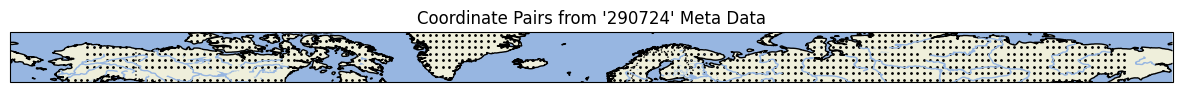

In [5]:
scenario.plot_coords()

In [6]:
scenario.addJob(func=pvdeg.standards.standoff, see_added=True)

C:\Users\tford\dev\PVDegradationTools\pvdeg\scenario.py:1569: UserWarning: standoff added to pipeline as 
 {'geospatial_job': {'job': <function standoff at 0x0000019930609900>, 'params': {}}}
  warnings.warn(message, UserWarning)


In [7]:
scenario.run()

Dashboard: http://127.0.0.1:8787/status
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 60.0 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was 

In [8]:
scenario.results

<xarray.Dataset> Size: 31kB
Dimensions:    (latitude: 8, longitude: 154)
Coordinates:
  * latitude   (latitude) float64 64B 60.0 62.0 64.0 66.0 68.0 70.0 72.0 74.0
  * longitude  (longitude) float64 1kB -164.0 -162.0 -160.0 ... 163.0 165.0
Data variables:
    x          (latitude, longitude) float64 10kB 0.0 0.0 0.0 ... nan nan nan
    T98_0      (latitude, longitude) float64 10kB 41.09 47.29 45.42 ... nan nan
    T98_inf    (latitude, longitude) float64 10kB 25.48 29.04 26.18 ... nan nan

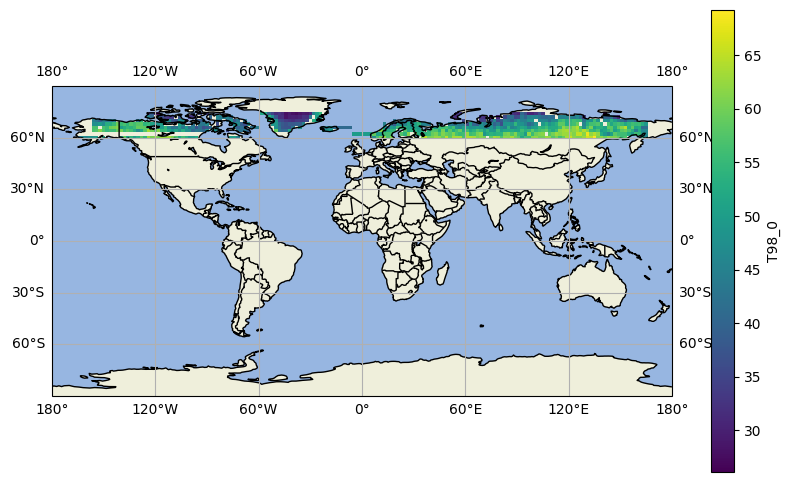

In [11]:
scenario.plot_world('T98_0')